# Using XgBoost for regression

In [78]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Data Processing

In [79]:
Train_Data = pd.read_csv("C:/Users/KevinZhang/Documents/GitHub/Group20-Project/Output/train.csv")
print(Train_Data.shape)
Test_Data = pd.read_csv("C:/Users/KevinZhang/Documents/GitHub/Group20-Project/Output/test.csv")
print(Test_Data.shape)

(28734, 435)
(9581, 435)


In [80]:
Train_Y = Train_Data.pop('review_scores_rating')
print(Train_Y.shape)
Train_X = Train_Data
print(Train_X.shape)
Test_Y = Test_Data.pop('review_scores_rating')
print(Test_Y.shape)
Test_X = Test_Data
print(Test_X.shape)

(28734,)
(28734, 434)
(9581,)
(9581, 434)


In [81]:
print(Train_X.columns)
len(Train_X.columns)

Index(['Unnamed: 0', 'id', 'host_is_superhost', 'property_type_Apartment',
       'property_type_Guest suite', 'property_type_House',
       'property_type_Loft', 'property_type_Townhouse',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       ...
       'neighbourhood_cleansed_Westchester Square',
       'neighbourhood_cleansed_Westerleigh',
       'neighbourhood_cleansed_Whitestone',
       'neighbourhood_cleansed_Williamsbridge',
       'neighbourhood_cleansed_Williamsburg',
       'neighbourhood_cleansed_Windsor Terrace',
       'neighbourhood_cleansed_Woodhaven', 'neighbourhood_cleansed_Woodlawn',
       'neighbourhood_cleansed_Woodrow', 'neighbourhood_cleansed_Woodside'],
      dtype='object', length=434)


434

In [82]:
All_Data_ID = pd.DataFrame(data =Train_X['id'])
All_Data_ID = All_Data_ID.append(pd.DataFrame(data = Test_X['id']), ignore_index=True)
Train_Data_ID = pd.DataFrame(data = Train_X['id'])
Test_Data_ID = pd.DataFrame(data = Test_X['id'])

In [83]:
Train_X.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
print(Train_X.shape)
Test_X.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
print(Test_X.shape)

(28734, 432)
(9581, 432)


In [84]:
XgBoost_Train = xgb.DMatrix(data = Train_X, label = Train_Y)
XgBoost_Test = xgb.DMatrix(data = Test_X, label = Test_Y)

## Selection of num_boost_round

In [8]:
params = {"objective":"reg:linear",'colsample_bytree': 1,'learning_rate': 0.03,'max_depth': 6, 'alpha': 0, 'gamma': 0,
          'min_child_weight ': 1,'subsample': 1, 'lambda': 0}

cv_results = xgb.cv(dtrain=XgBoost_Train, params=params, nfold=5, num_boost_round=500, 
                    metrics="rmse", as_pandas=True, early_stopping_rounds=True)

[23:32:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[23:32:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[23:32:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[23:32:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[23:32:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[23:32:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[23:32:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

[23:32:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[23:32:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[23:32:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[23:32:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[23:32:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[23:32:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[23:32:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

[23:32:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[23:32:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[23:32:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[23:32:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[23:32:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[23:32:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[23:32:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

[23:32:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[23:32:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[23:32:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[23:32:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[23:32:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[23:32:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[23:32:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

[23:32:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[23:32:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[23:32:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[23:32:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[23:32:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[23:32:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[23:32:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

[23:32:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[23:32:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[23:32:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[23:32:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[23:32:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[23:32:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[23:32:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

[23:33:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[23:33:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[23:33:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[23:33:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[23:33:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[23:33:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[23:33:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

[23:33:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[23:33:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[23:33:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[23:33:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[23:33:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[23:33:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[23:33:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[23:33:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[23:33:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[23:33:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[23:33:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[23:33:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[23:33:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[23:33:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[23:33:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[23:33:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[23:33:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[23:33:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[23:33:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[23:33:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[23:33:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

[23:33:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[23:33:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[23:33:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[23:33:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[23:33:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[23:33:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[23:33:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[23:33:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[23:33:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[23:33:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[23:33:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[23:33:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[23:33:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[23:33:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[23:34:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[23:34:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[23:34:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[23:34:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[23:34:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[23:34:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=6
[23:34:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

[23:34:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[23:34:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[23:34:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[23:34:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[23:34:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[23:34:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[23:34:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[23:34:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[23:34:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[23:34:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[23:34:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[23:34:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[23:34:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[23:34:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[23:34:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[23:34:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[23:34:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[23:34:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[23:34:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[23:34:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[23:34:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[23:34:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[23:34:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[23:34:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[23:34:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[23:34:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[23:34:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[23:34:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[23:34:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[23:34:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[23:34:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[23:34:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[23:34:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[23:34:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[23:34:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

In [9]:
Min_MAE_Index = cv_results['test-rmse-mean'].idxmin()
print(cv_results.iloc[cv_results['test-rmse-mean'].idxmin()][2])
print(Min_MAE_Index)

7.430888800000001
195


## Selection of Learning Rate

In [10]:
learning_rate_vector = [0.01, 0.03, 0.05, 0.07, 0.1, 0.2, 0.3]

In [11]:
RMAE_learning_rate = []
for i in range(len(learning_rate_vector)):
    learning_rate_current = learning_rate_vector[i]
    RMAEj = []
    for j in range(1,11):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = learning_rate_current,
                                       max_depth = 6, alpha = 0, n_estimators = Min_MAE_Index, gamma = 0, min_child_weight = 1,
                                       subsample = 1, reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_learning_rate.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_Learning_Rate = learning_rate_vector[RMAE_learning_rate.index(min(RMAE_learning_rate))]

RMSE: 15.058318
RMSE: 7.448312
RMSE: 7.569739
RMSE: 7.468828
RMSE: 7.421029
RMSE: 7.650166
RMSE: 7.791905


In [12]:
Optimal_Learning_Rate

0.1

## Selection of Max Depth

In [13]:
Max_Depth_Vector = range(1,11)

In [14]:
RMAE_Max_Depth = []
for i in range(len(Max_Depth_Vector)):
    Max_Depth_Current = Max_Depth_Vector[i]
    RMAEj = []
    for j in range(1,11):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = Optimal_Learning_Rate,
                                       max_depth = Max_Depth_Current, alpha = 0, n_estimators = Min_MAE_Index, gamma = 0, min_child_weight = 1,
                                       subsample = 1, reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_Max_Depth.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_Max_Depth = Max_Depth_Vector[RMAE_Max_Depth.index(min(RMAE_Max_Depth))]

RMSE: 7.598416
RMSE: 7.537734
RMSE: 7.413634
RMSE: 7.185809
RMSE: 7.472943
RMSE: 7.392356
RMSE: 7.416617
RMSE: 7.598227
RMSE: 7.424348
RMSE: 7.591029


In [15]:
Optimal_Max_Depth

4

## Selection of min_child_weight

In [16]:
min_child_weight_Vector = range(1,11)

In [17]:
RMAE_min_child_weight = []
for i in range(len(min_child_weight_Vector)):
    min_child_weight_Current = min_child_weight_Vector[i]
    RMAEj = []
    for j in range(1,11):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = Optimal_Learning_Rate,
                                   max_depth = Optimal_Max_Depth, alpha = 0, n_estimators = Min_MAE_Index, 
                                   min_child_weight = min_child_weight_Current, gamma = 0, subsample = 1, reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_min_child_weight.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_min_child_weight = min_child_weight_Vector[RMAE_min_child_weight.index(min(RMAE_min_child_weight))]

RMSE: 7.461453
RMSE: 7.410170
RMSE: 7.273367
RMSE: 7.375790
RMSE: 7.253026
RMSE: 7.439884
RMSE: 7.384565
RMSE: 7.391760
RMSE: 7.557225
RMSE: 7.296972


In [18]:
Optimal_min_child_weight

5

## Selection of Gamma

In [19]:
gamma_vector = [i/10.0 for i in range(0,7)]

In [20]:
RMAE_gamma = []
for i in range(len(gamma_vector)):
    gamma_Current = gamma_vector[i]
    RMAEj = []
    for j in range(1,11):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = Optimal_Learning_Rate,
                                       max_depth = Optimal_Max_Depth, alpha = 0, n_estimators = Min_MAE_Index, 
                                       min_child_weight = Optimal_min_child_weight, gamma = gamma_Current, subsample = 1, reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_gamma.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_gamma = gamma_vector[RMAE_gamma.index(min(RMAE_gamma))]

RMSE: 7.379319
RMSE: 7.403502
RMSE: 7.559925
RMSE: 7.285625
RMSE: 7.308636
RMSE: 7.477228
RMSE: 7.356292


In [21]:
Optimal_gamma

0.3

## Selection of subsample

In [22]:
subsample_vector = [i/10.0 for i in range(5,11)]

In [23]:
RMAE_subsample = []
for i in range(len(subsample_vector)):
    subsample_Current = subsample_vector[i]
    RMAEj = []
    for j in range(1,11):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = Optimal_Learning_Rate,
                                       max_depth = Optimal_Max_Depth, alpha = 0, n_estimators = Min_MAE_Index, 
                                       min_child_weight = Optimal_min_child_weight, gamma = Optimal_gamma, subsample = subsample_Current,
                                       reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_subsample.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_subsample = subsample_vector[RMAE_subsample.index(min(RMAE_subsample))]

RMSE: 7.399522
RMSE: 7.397695
RMSE: 7.308896
RMSE: 7.419404
RMSE: 7.466171
RMSE: 7.240564


In [24]:
Optimal_subsample

1.0

## Selection of colsample_bytree¶

In [25]:
colsample_bytree_vector = [i/10.0 for i in range(5,11)]

In [26]:
RMAE_colsample_bytree = []
for i in range(len(colsample_bytree_vector)):
    colsample_bytree_Current = colsample_bytree_vector[i]
    RMAEj = []
    for j in range(1,6):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = colsample_bytree_Current, 
                                       learning_rate = Optimal_Learning_Rate,
                                       max_depth = Optimal_Max_Depth, alpha = 0, n_estimators = Min_MAE_Index, 
                                       min_child_weight = Optimal_min_child_weight, gamma = Optimal_gamma, subsample = Optimal_subsample,
                                       reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_colsample_bytree.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_colsample_bytree = colsample_bytree_vector[RMAE_colsample_bytree.index(min(RMAE_colsample_bytree))]

RMSE: 7.447388
RMSE: 7.422538
RMSE: 7.485141
RMSE: 7.395962
RMSE: 7.343044
RMSE: 7.261639


In [27]:
Optimal_colsample_bytree

1.0

## Selection of alpha¶

In [28]:
alpha_vector = [0, 0.001, 0.005, 0.01, 0.05, 0.5, 1, 3, 5, 10, 50]

In [29]:
RMAE_alpha = []
for i in range(len(alpha_vector)):
    alpha_Current = alpha_vector[i]
    RMAEj = []
    for j in range(1,6):
        XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = Optimal_colsample_bytree, 
                                       learning_rate = Optimal_Learning_Rate,
                                       max_depth = Optimal_Max_Depth, alpha = alpha_Current, n_estimators = Min_MAE_Index, 
                                       min_child_weight = Optimal_min_child_weight, gamma = Optimal_gamma, subsample = Optimal_subsample,
                                       reg_lambda = 0)
        X_Train, X_Validation, Y_Train, Y_Validation = train_test_split(Train_X, Train_Y, test_size=0.1)
        XgBoost_Fit.fit(X_Train,Y_Train)
        Preds = XgBoost_Fit.predict(X_Validation)
        RMAEj.append(np.sqrt(mean_squared_error(Y_Validation, Preds)))
    RMAE_alpha.append(np.mean(RMAEj))
    print("RMSE: %f" % (np.mean(RMAEj)))
Optimal_alpha = alpha_vector[RMAE_alpha.index(min(RMAE_alpha))]

RMSE: 7.416235
RMSE: 7.298821
RMSE: 7.447721
RMSE: 7.349307
RMSE: 7.360876
RMSE: 7.322759
RMSE: 7.259413
RMSE: 7.387512
RMSE: 7.299563
RMSE: 7.425475
RMSE: 7.305074
RMSE: 7.313796


In [30]:
Optimal_alpha

1

## Trained XgBoost Model

In [46]:
start_time = time.time()
XgBoost_Fit = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = Optimal_colsample_bytree, 
                               learning_rate = Optimal_Learning_Rate,
                               max_depth = Optimal_Max_Depth, alpha = Optimal_alpha, n_estimators = Min_MAE_Index, 
                               min_child_weight = Optimal_min_child_weight, gamma = Optimal_gamma, subsample = Optimal_subsample,
                               reg_lambda = 0)
XgBoost_Fit.fit(Train_X,Train_Y)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=5, missing=None,
       n_estimators=195, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
       seed=None, silent=True, subsample=1.0)

In [47]:
Preds = XgBoost_Fit.predict(Test_X)
elapsed_time = time.time() - start_time
print(elapsed_time)
print("RMSE: %f" % (np.sqrt(mean_squared_error(Preds, Test_Y))))

117.58369135856628
RMSE: 9.583086


In [57]:
Train_Data_Pred = pd.concat([Train_Data_ID, pd.DataFrame(Preds,columns=['Prediction'])], axis=1)
Train_Data_Pred.to_csv('Train_Data_Pred.csv')
Train_Data_Pred.shape

(28734, 2)

In [58]:
np.max(Preds)

102.21695

## Prediction for Whole Dataset

In [65]:
All_Data = Train_X.append(pd.DataFrame(data = Test_X), ignore_index=True)
Preds = XgBoost_Fit.predict(All_Data)
All_Data_Pred = pd.concat([All_Data_ID, pd.DataFrame(Preds,columns=['Prediction'])], axis=1)
All_Data_Pred.to_csv('All_Data_Pred.csv')
All_Data_Pred.shape

(38315, 2)

## Feature Importance

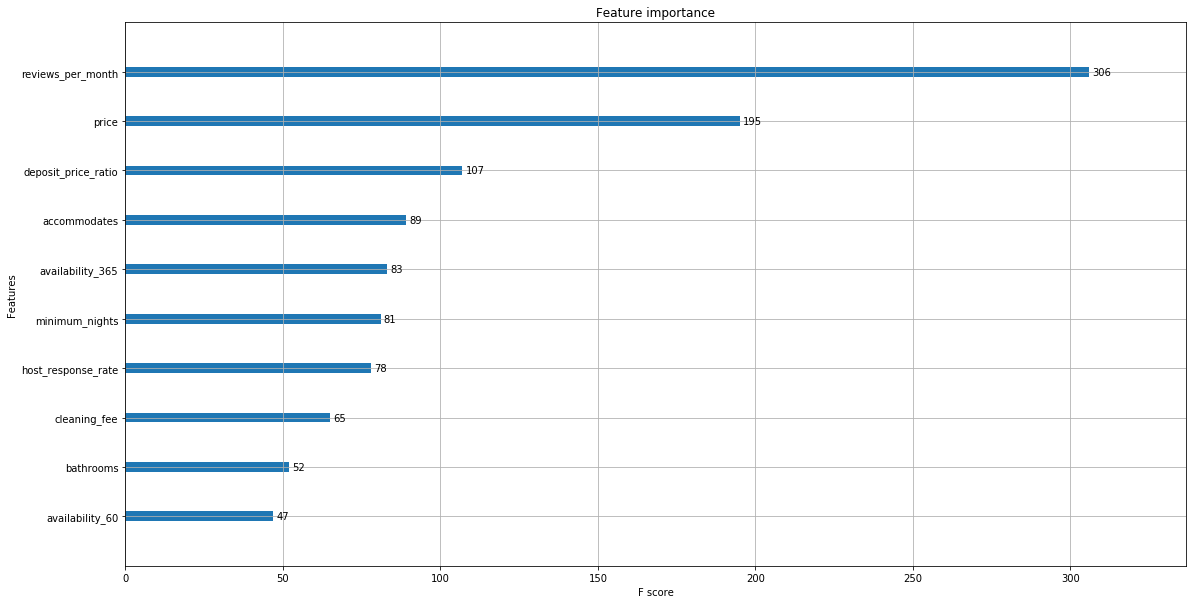

In [61]:
xgb.plot_importance(XgBoost_Fit, max_num_features = 10)
plt.rcParams['figure.figsize'] = [19, 10]
plt.show()

## Reference

Why MAE?

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

XgBoost

https://www.datacamp.com/community/tutorials/xgboost-in-python

Tuning Parameter for XgBoost

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

XgBoost Website

https://xgboost.readthedocs.io/en/latest/parameter.html

In [75]:
XgB_Test_Data_Pred = pd.concat([Test_Data_ID, pd.DataFrame(Preds,columns=['Prediction'])], axis=1)
XgB_Test_Data_Pred.to_csv('XgB_Test_Data_Pred.csv')

In [67]:
Preds = XgBoost_Fit.predict(Test_X)

In [86]:
Preds = XgBoost_Fit.predict(Train_X)
Train_Data_ID

,id
0,6374694
1,7218561
2,20553159
3,17415890
4,16825557
5,22689704
6,22807347
7,10268868
8,17972013
9,26110466


In [87]:
Train_Data_Pred = pd.concat([Train_Data_ID, pd.DataFrame(Preds,columns=['Prediction'])], axis=1)
Train_Data_Pred.to_csv('XgB_Train_Data_Pred.csv')
Train_Data_Pred.shape

(28734, 2)

In [88]:
Train_Data_Pred

,id,Prediction
0,6374694,91.694763
1,7218561,96.525192
2,20553159,94.039619
3,17415890,96.007385
4,16825557,93.279366
5,22689704,92.358803
6,22807347,93.784668
7,10268868,96.448868
8,17972013,91.844139
9,26110466,96.495934


In [90]:
xgb.importance(XgBoost_Fit, max_num_features = 10)

AttributeError: module 'xgboost' has no attribute 'importance'

In [92]:
xgb.

<_io.TextIOWrapper name='C:\\Users\\KevinZhang\\Anaconda3\\lib\\site-packages\\xgboost\\VERSION' mode='r' encoding='cp936'>